<a href="https://colab.research.google.com/github/tanvir-talha058/Machine-Learning/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [6]:
dataset_path = '/content/drive/My Drive/dataset1'
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'validation')


In [7]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data rescaling
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),  # Input size for InceptionV3
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)


Found 3389 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [8]:
# Load the InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers for transfer learning
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularization
predictions = Dense(4, activation='softmax')(x)  # 4 classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Adjust epochs as needed
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 2633s 24s/step - accuracy: 0.6490 - loss: 0.8630 - val_accuracy: 0.8963 - val_loss: 0.3212
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8621 - loss: 0.3875 


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1537s 14s/step - accuracy: 0.9307 - loss: 0.2376 - val_accuracy: 0.9413 - val_loss: 0.1944
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 799us/step - accuracy: 0.9688 - loss: 0.1114
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1506s 14s/step - accuracy: 0.9459 - loss: 0.1596 - val_accuracy: 0.9650 - val_loss: 0.1435
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 1.0000 - loss: 0.0442  
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1498s 14s/step - accuracy: 0.9524 - loss: 0.1455 - val_accuracy: 0.9663 - val_loss: 0.1130
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 897us/step - accuracy: 1.0000 - loss: 0.0621
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1530s 14s/step - accuracy: 0.9704 - loss: 0.1034 - val_accuracy: 0.9663 - val_loss: 0.1108
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 711us/step - accuracy: 0.9375 - loss: 0.1704


In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('/content/drive/My Drive/inceptionv3_model.h5')


25/25 ━━━━━━━━━━━━━━━━━━━━ 217s 9s/step - accuracy: 0.9690 - loss: 0.1095


Validation Accuracy: 96.63%


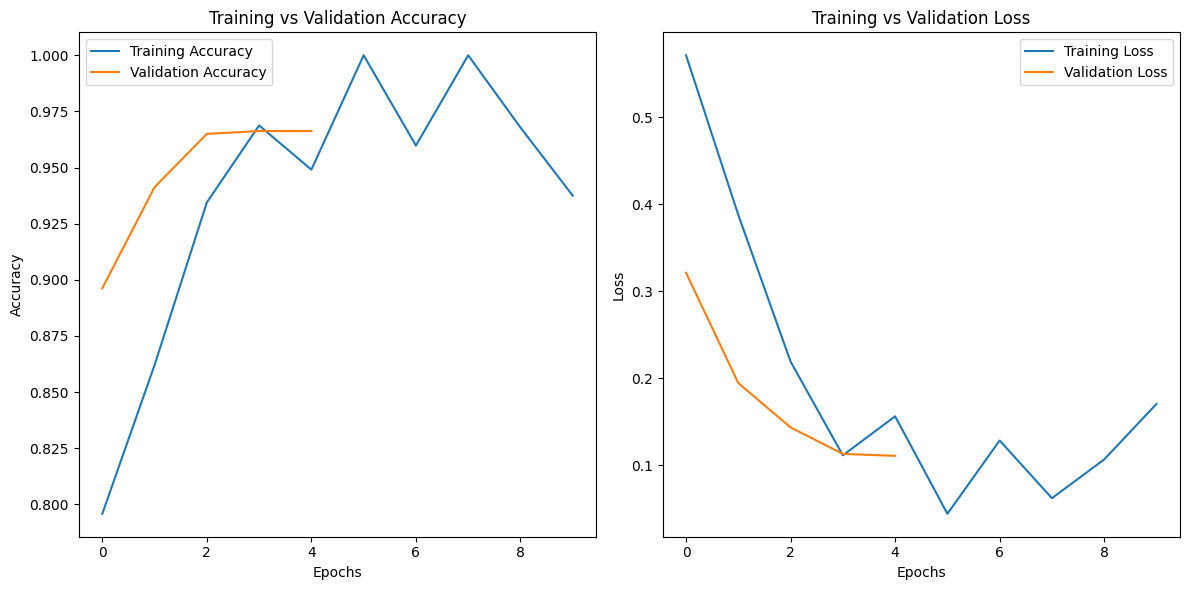

In [13]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 242s 10s/step


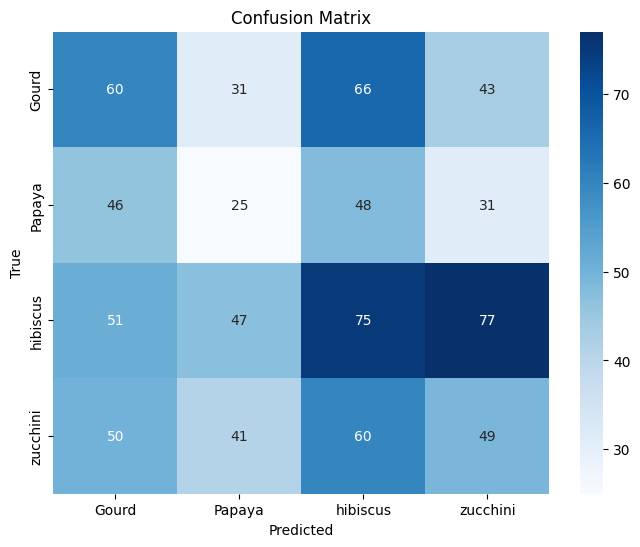

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the validation set
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices, yticklabels=val_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
!apt-get install -y graphviz
!pip install pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [20]:
!pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 19.4 MB/s eta 0:00:00


In [21]:
import visualkeras

# Visualize the model
visualkeras.layered_view(model).show()


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


In [23]:
# Save the visualization as an image
visualkeras.layered_view(model).save('/content/drive/My Drive/inceptionv3_model_visualization.png')


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Select a batch of images from the validation set
sample_images, sample_labels = next(val_generator)

# Make predictions on these images
predictions = model.predict(sample_images)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


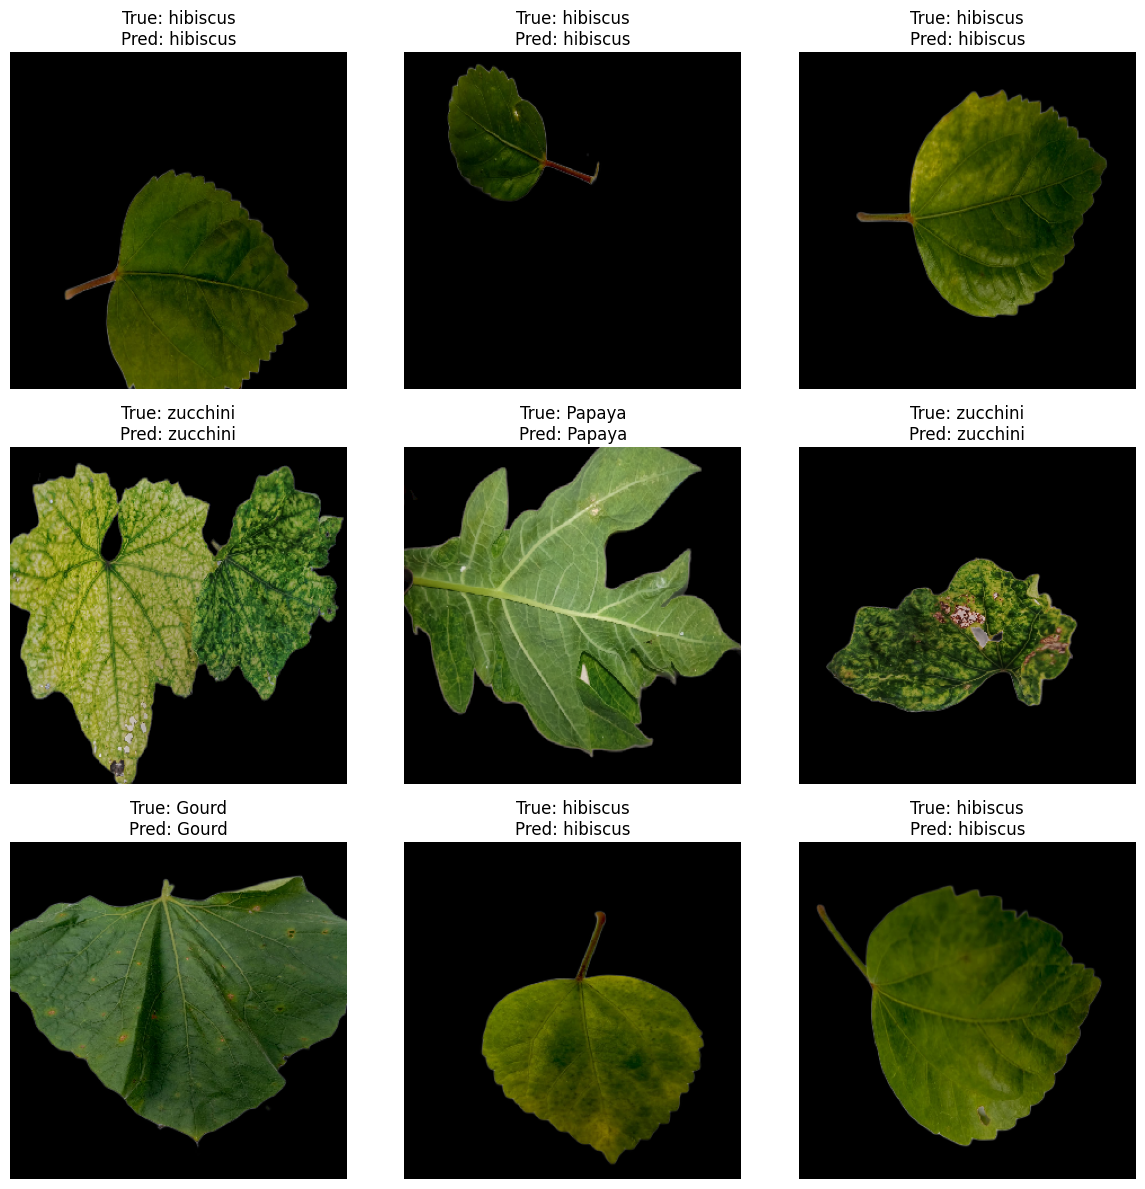

In [25]:
# Plot some of the images with their true and predicted labels
plt.figure(figsize=(12, 12))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {list(val_generator.class_indices.keys())[true_classes[i]]}\nPred: {list(val_generator.class_indices.keys())[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.9883 - loss: 0.0396
Validation Accuracy: 99.00%


In [27]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(true_classes, predicted_classes, target_names=list(val_generator.class_indices.keys())))


              precision    recall  f1-score   support

       Gourd       1.00      1.00      1.00         7
      Papaya       1.00      1.00      1.00         6
    hibiscus       1.00      1.00      1.00        11
    zucchini       1.00      1.00      1.00         8

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

